In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('ggplot')

# Args

In [4]:
EXP = "exp5"
PLATFORM = "ILLUMINA"

In [5]:
MAPPING = 'KMA' # BLAST
BARCODE_SYSTEM = '10x' #'AKB' #

## Input

In [12]:
IN_FILE = ("/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" +
           EXP + "_CAT_" + PLATFORM + "_" + BARCODE_SYSTEM +
           "/tables/tcr_barcode." + MAPPING + "." + BARCODE_SYSTEM + ".clean.csv")

In [13]:
INPUT_A = ("/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" +
           EXP + "_CAT_" + PLATFORM + "_" + BARCODE_SYSTEM + "/similarity_assessment/m1.all.a.results.tab")
INPUT_B = ("/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" +
           EXP + "_CAT_" + PLATFORM + "_" + BARCODE_SYSTEM + "/similarity_assessment/m1.all.b.results.tab")

In [14]:
#m1 = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_merged/reports/similarity_assessment/m1.all.a.results.tab"

# Main

In [15]:
total_df = pd.read_csv(IN_FILE)

In [17]:
a_df = pd.read_csv(INPUT_A, sep=" ", names=['seq1', 'seq2', 'similarity'], usecols=[1,2,3], comment='#')
b_df = pd.read_csv(INPUT_B, sep=" ", names=['seq1', 'seq2', 'similarity'], usecols=[1,2,3], comment='#')

In [18]:
a_df.head()

,seq1,seq2,similarity
0,CAAKSDSGGGADGLTF,CAAKSDSGGGADGLTF,1.000000
1,CAAKSDSGGGADGLTF,CAGGGSSNTGKLIF,0.799685
2,CAAKSDSGGGADGLTF,CVVNRRQAGTALIF,0.729227
3,CAAKSDSGGGADGLTF,CARNTGNQFYF,0.710314
4,CAAKSDSGGGADGLTF,CGAVAPWGGATNKLIF,0.744292


## Merge similarity scores with the total dataframe

In [31]:
MA = pd.pivot_table(a_df, index='seq1', columns='seq2', values='similarity', aggfunc=np.max) #.pivot(index='seq1', columns='seq2', values='similarity')
MB = pd.pivot_table(b_df, index='seq1', columns='seq2', values='similarity', aggfunc=np.max)

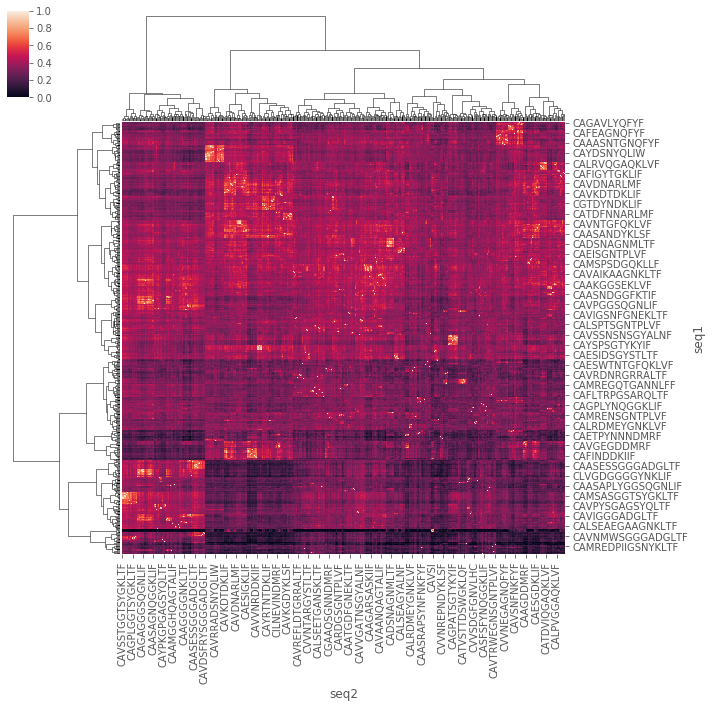

In [35]:
# https://python-graph-gallery.com/404-dendrogram-with-heat-map/
sns.clustermap(matrix, metric="euclidean", standard_scale=1, method="ward")
plt.show()